In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [2]:
sys.path.append('..')

## Calculating Vaccine Coverage for Municipalities

In [3]:
def coverage_age(p,e):
    return (1 +((1-e)*((1/p) -1)))**-1

## Some municipalities with the most cases

In [4]:
first_10 = [355030., 130260., 150140.,130250., 351630.]
first_10_names = ['SP','Manaus','Belem','Manaus','Francisco Morato']
#first_10 = [355030]
#first_10_names = ['SP']

## Data on population pyramids

In [5]:
data_muns = pd.read_csv('../Data/age_groups_municipalities.csv')

In [6]:
data_muns

,Unnamed: 0,Municipio,0 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,80 anos e mais,Total
0,0,110001,1601,1592,1556,1623,3652,3568,3101,2901,1782,812,328,22516
1,1,110002,8396,8262,8317,9490,20100,18822,15160,11695,6809,2991,1106,111148
2,2,110003,379,375,332,292,724,754,785,699,459,191,77,5067
3,3,110004,5846,5939,6065,6412,14391,14626,12374,10077,6509,2939,1238,86416
4,4,110005,1068,1097,1077,1094,2594,2648,2254,2129,1263,617,247,16088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5565,522200,962,970,884,950,2195,2229,2168,1813,1085,566,266,14088
5566,5566,522205,671,680,640,648,1414,1555,1351,1082,588,259,114,9002
5567,5567,522220,571,544,457,494,1143,1299,924,586,276,117,40,6451
5568,5568,522230,436,425,342,359,881,849,892,855,539,271,92,5941


## Calculating coverage and $S_0$ for each municipality

In [7]:
df_mun = pd.read_csv('../Data/analyzed/age_vaccine_municipalities.csv')
mun_path = '../Data/municipalities.csv'
mun_file = pd.read_csv(mun_path)
mun_file['codigo'] = mun_file['municipio'].astype(str).str[:6].astype(int)
mun_file = mun_file[['municipio','name','codigo']]
df_mun = df_mun.merge(mun_file, how = 'left', left_on = 'ID_MN_RESI', right_on = 'codigo')

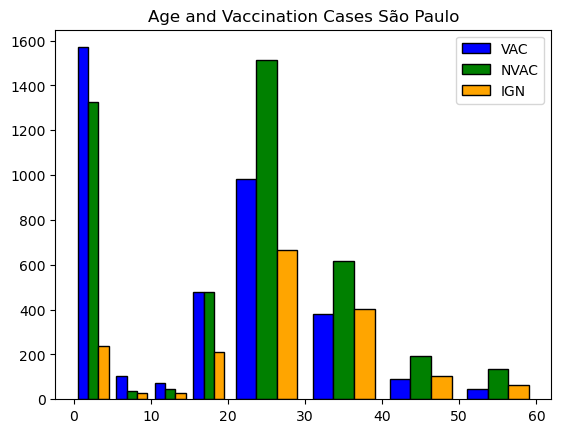

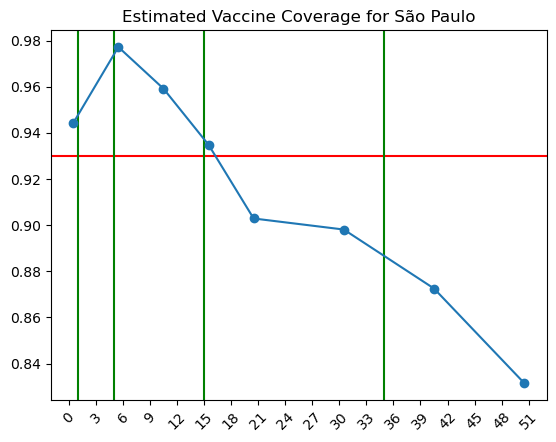

[ 779817  787114  779315  841885 1832490 2015873 1845307 1463257]
[0.05574133 0.0228013  0.04082955 0.06516521 0.09711517 0.10190962
 0.12746586 0.16843595]
1013174.1231748776


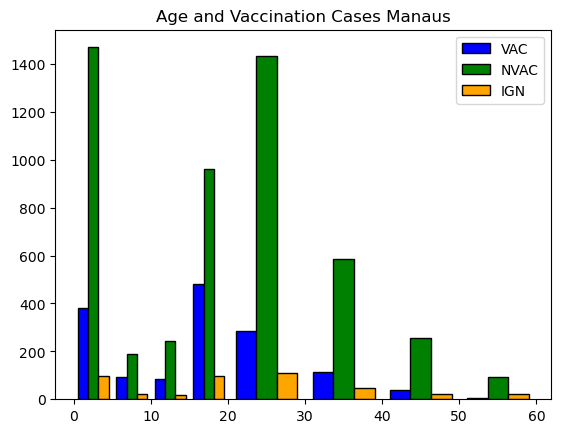

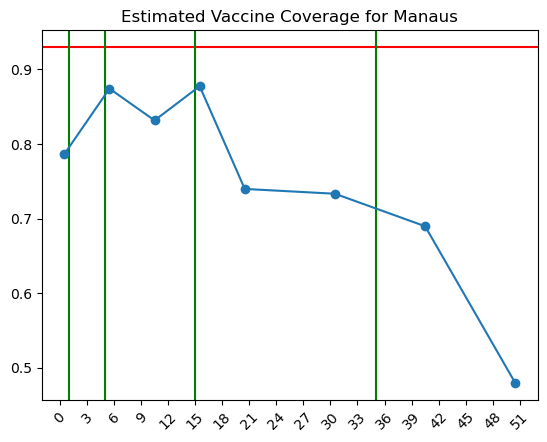

[173176 182624 195468 199775 413206 378413 313557 204616]
[0.21341552 0.1257246  0.16839917 0.12247164 0.26020143 0.26666234
 0.3102259  0.52038369]
529479.8193919165


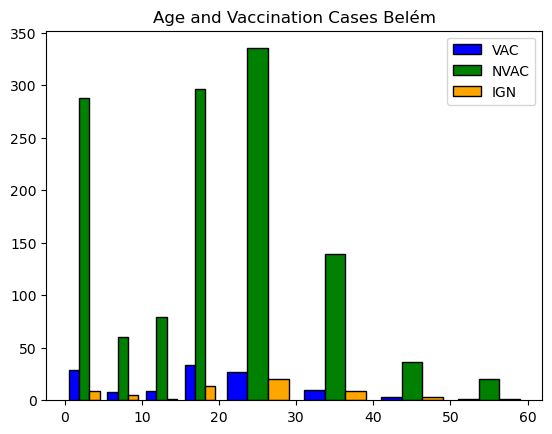

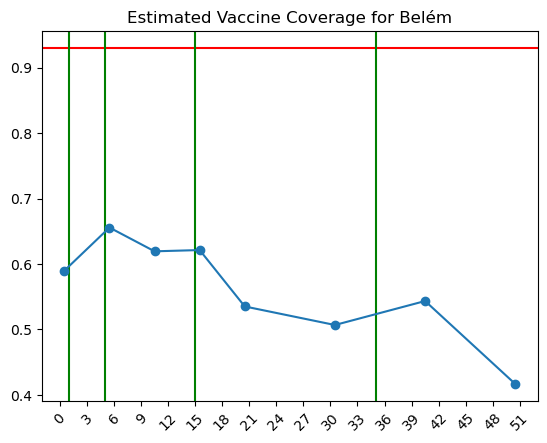

[ 82062  90331 111076 121161 238149 250445 231280 174536]
[0.4100895  0.3442623  0.38059188 0.37865497 0.46481665 0.49315763
 0.45652174 0.58333333]
594504.6577241914


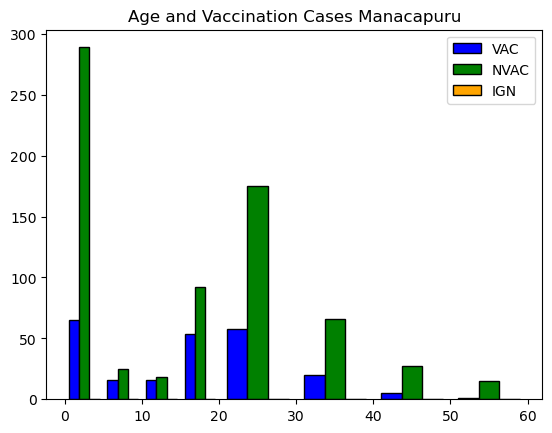

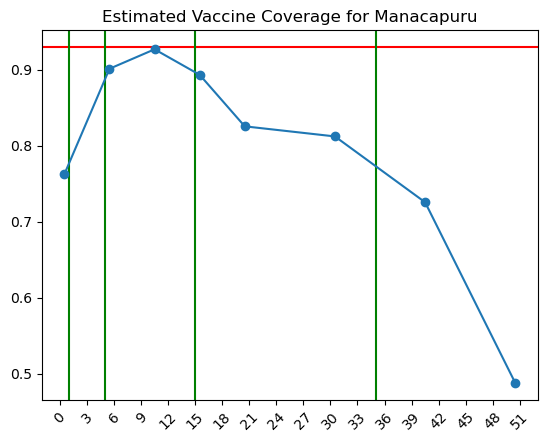

[10447 10671  9766  9021 18360 14907 11171  7295]
[0.23735774 0.09859155 0.07300116 0.10655195 0.17437722 0.18765232
 0.2743106  0.51219512]
18005.56715966841


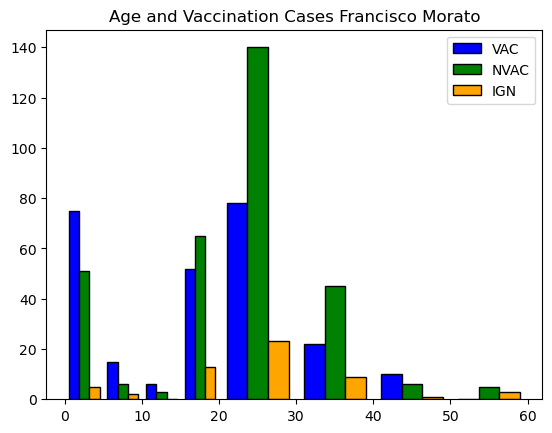

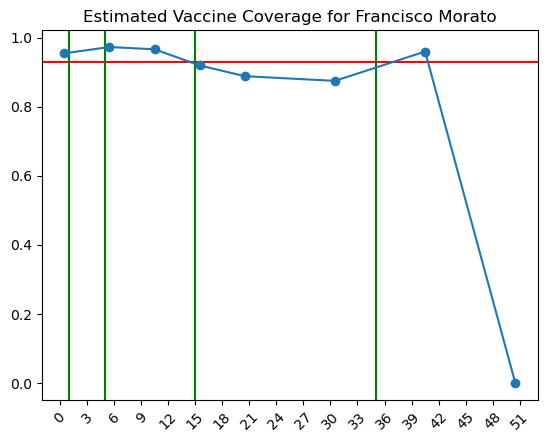

[15572 15136 13612 13603 30810 29637 23496 17933]
[0.04543719 0.02723735 0.03381643 0.08045977 0.11161731 0.12524851
 0.0403071  1.        ]
28705.591048906357


In [8]:
for mun in first_10:
    df_tmp = df_mun[df_mun['ID_MN_RESI'] == mun]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] <= 60]
    mun_name = df_tmp['name'].unique()[0]
    min_age = 0
    max_age = 60
    colors=['blue', 'green', 'orange']
    names=['VAC', 'NVAC', 'IGN']
    x_vac = list(df_tmp[df_tmp['CS_VACINA'] == 1]['NU_IDADE_N'])
    x_nvac = list(df_tmp[df_tmp['CS_VACINA'] == 2]['NU_IDADE_N'])
    x_ign = list(df_tmp[df_tmp['CS_VACINA'] == 9]['NU_IDADE_N'])
    bins_grouped = np.array([0,5,10,15,20,30,40,50,60])
    #bins_grouped = np.array([0,5,10,15,20,30,40])
    bins = plt.hist([x_vac, x_nvac, x_ign], color=colors, label=names, bins=bins_grouped,  edgecolor = 'black')
    plt.title('Age and Vaccination Cases '+ str(mun_name))
    plt.legend()
    plt.show()
    vacs = bins[0][0]
    nvacs = bins[0][1]
    ign = bins[0][2]
    #vacs = vacs[1:]
    #nvacs = nvacs[1:]
    #ign = ign[1:]
    p_vacs = vacs/(vacs+nvacs)
    c_vacs = []
    for p in p_vacs:
        if(p == np.nan):
            c_vacs.append(np.nan)
        elif(p == 0):
            c_vacs.append(0)
        else:
            c_vacs.append(coverage_age(p,0.93))
    plt.xticks(np.arange(0,max_age+1,3), rotation = 45)
    plt.axhline(0.93,color = 'r')
    plt.axvline(1, color = 'g')
    plt.axvline(5, color = 'g')
    plt.axvline(15, color = 'g')
    plt.axvline(35, color = 'g')
    plt.title('Estimated Vaccine Coverage for '+ str(mun_name))
    plt.plot(bins[1][0:-1] + 0.5,c_vacs,'-o')
    plt.show()
    # population pyramid of this municipality
    data_sp = data_muns[data_muns['Municipio'] == mun]
    data_sp = data_sp.to_numpy()[0]
    data_sp = data_sp[2:10]
    vec_coverage = 1 - np.array(c_vacs)
    vec_population = data_sp
    vec_nvac_population = vec_coverage*vec_population
    print(data_sp)
    print(vec_coverage)
    total_nvac = np.sum(vec_coverage*vec_population)
    print(total_nvac)

## Calculating coverage and $S_0$ for each municipality with ignored

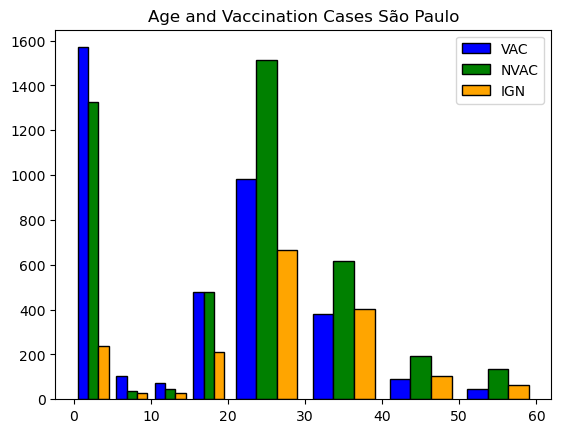

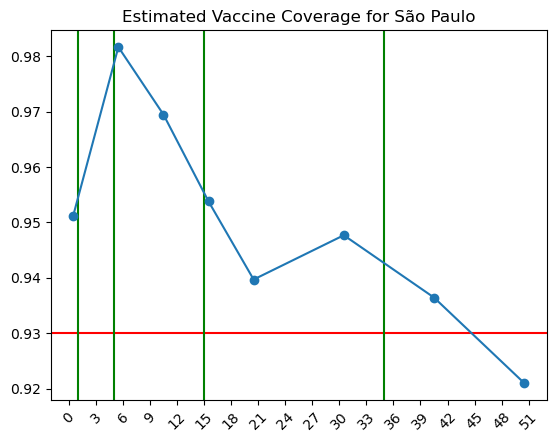

[ 779817  787114  779315  841885 1832490 2015873 1845307 1463257]
[0.0487615  0.01835894 0.03053805 0.04622157 0.06031319 0.05232248
 0.06356413 0.07899104]
564065.9431631977


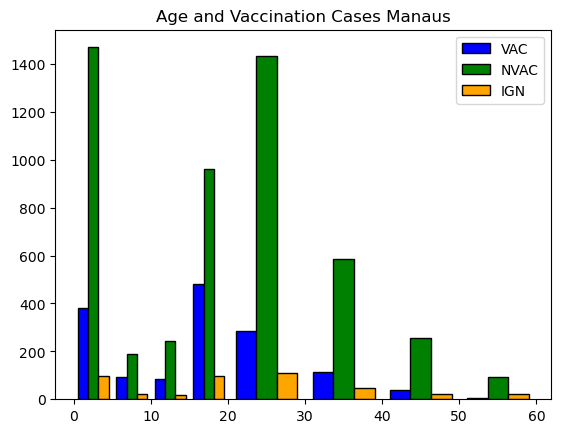

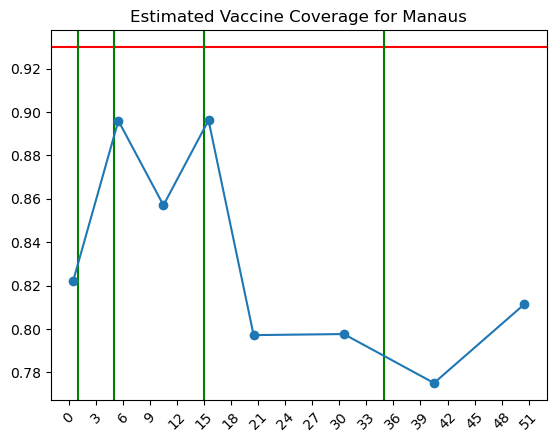

[173176 182624 195468 199775 413206 378413 313557 204616]
[0.17765147 0.10398491 0.14292917 0.10376849 0.20281645 0.20232409
 0.22490311 0.18864097]
367909.48535916395


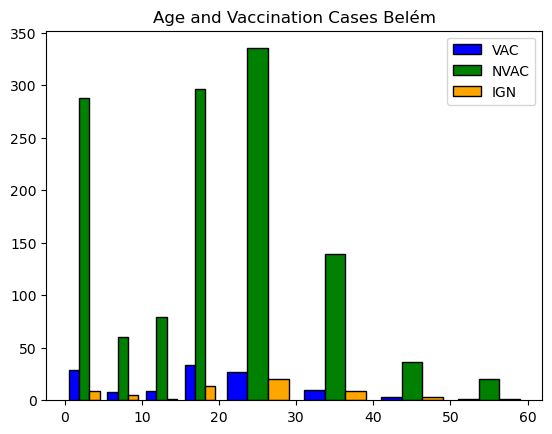

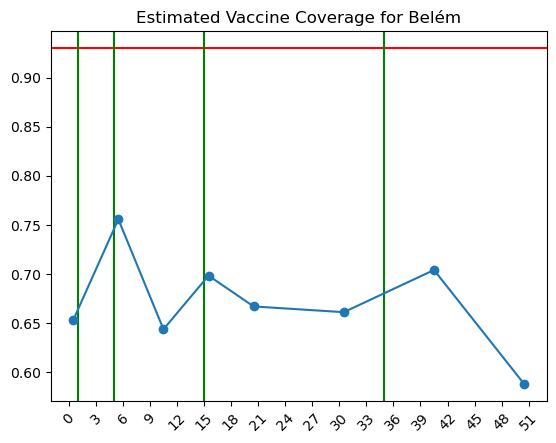

[ 82062  90331 111076 121161 238149 250445 231280 174536]
[0.34662999 0.24418605 0.356085   0.30151339 0.33286018 0.33867038
 0.29577465 0.41176471]
430950.02888518036


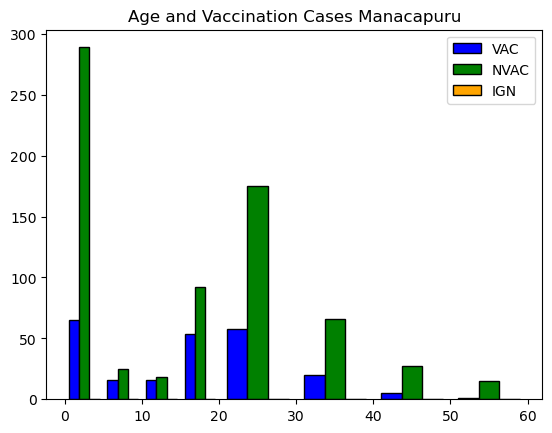

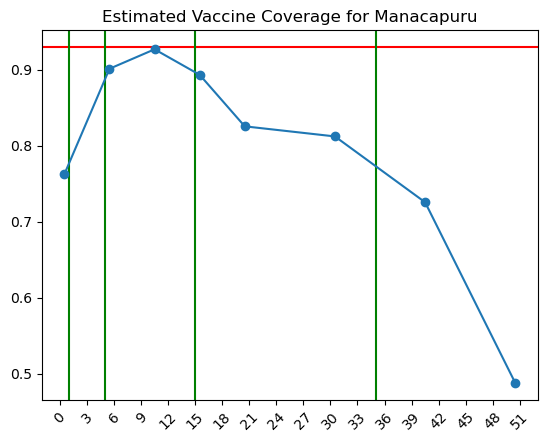

[10447 10671  9766  9021 18360 14907 11171  7295]
[0.23735774 0.09859155 0.07300116 0.10655195 0.17437722 0.18765232
 0.2743106  0.51219512]
18005.56715966841


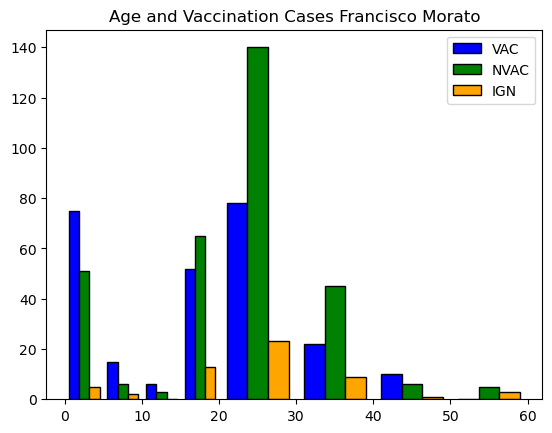

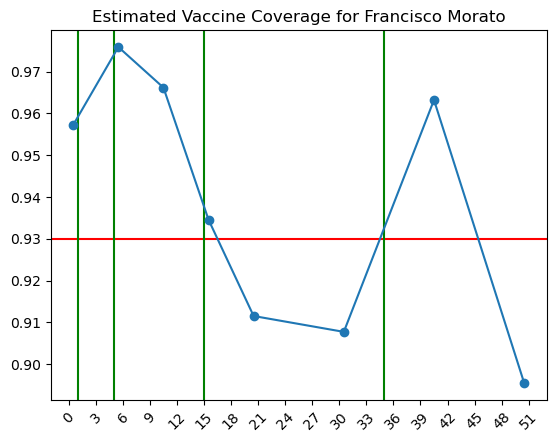

[15572 15136 13612 13603 30810 29637 23496 17933]
[0.04271868 0.02411022 0.03381643 0.06542056 0.08844765 0.09224012
 0.03677758 0.10447761]
10576.888260052858


In [9]:
for mun in first_10:
    df_tmp = df_mun[df_mun['ID_MN_RESI'] == mun]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] <= 60]
    mun_name = df_tmp['name'].unique()[0]
    min_age = 0
    max_age = 60
    colors=['blue', 'green', 'orange']
    names=['VAC', 'NVAC', 'IGN']
    x_vac = list(df_tmp[df_tmp['CS_VACINA'] == 1]['NU_IDADE_N'])
    x_nvac = list(df_tmp[df_tmp['CS_VACINA'] == 2]['NU_IDADE_N'])
    x_ign = list(df_tmp[df_tmp['CS_VACINA'] == 9]['NU_IDADE_N'])
    bins_grouped = np.array([0,5,10,15,20,30,40,50,60])
    bins = plt.hist([x_vac, x_nvac, x_ign], color=colors, label=names, bins=bins_grouped, edgecolor = 'black')
    plt.title('Age and Vaccination Cases '+ str(mun_name))
    plt.legend()
    plt.show()
    vacs = bins[0][0]
    nvacs = bins[0][1]
    ign = bins[0][2]
    #vacs = vacs[1:]
    #nvacs = nvacs[1:]
    #ign = ign[1:]
    vacs = vacs + ign
    p_vacs = vacs/(vacs+nvacs)
    c_vacs = []
    for p in p_vacs:
        if(p == np.nan):
            c_vacs.append(np.nan)
        elif(p == 0):
            c_vacs.append(0)
        else:
            c_vacs.append(coverage_age(p,0.93))
    plt.xticks(np.arange(0,max_age+1,3), rotation = 45)
    plt.axhline(0.93,color = 'r')
    plt.axvline(1, color = 'g')
    plt.axvline(5, color = 'g')
    plt.axvline(15, color = 'g')
    plt.axvline(35, color = 'g')
    plt.title('Estimated Vaccine Coverage for '+ str(mun_name))
    plt.plot(bins[1][0:-1] + 0.5,c_vacs,'-o')
    plt.show()
    # population pyramid of this municipality
    data_sp = data_muns[data_muns['Municipio'] == mun]
    data_sp = data_sp.to_numpy()[0]
    data_sp = data_sp[2:10]
    vec_coverage = 1 - np.array(c_vacs)
    vec_population = data_sp
    vec_nvac_population = vec_coverage*vec_population
    print(data_sp)
    print(vec_coverage)
    total_nvac = np.sum(vec_coverage*vec_population)
    print(total_nvac)

## Checking how each group contributes to see where this can fail

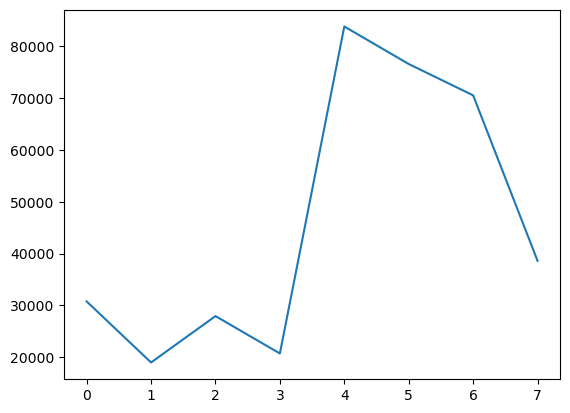

In [10]:
pop_manaus = np.array([173176, 182624, 195468, 199775, 413206, 378413, 313557, 204616])
vac_cov = np.array([0.17765147, 0.10398491, 0.14292917, 0.10376849, 0.20281645, 0.20232409, 0.22490311, 0.18864097])
plt.plot(pop_manaus * vac_cov)

## Doing calculation of S_0 using 15 to 40 years 

### Excluding ignored 

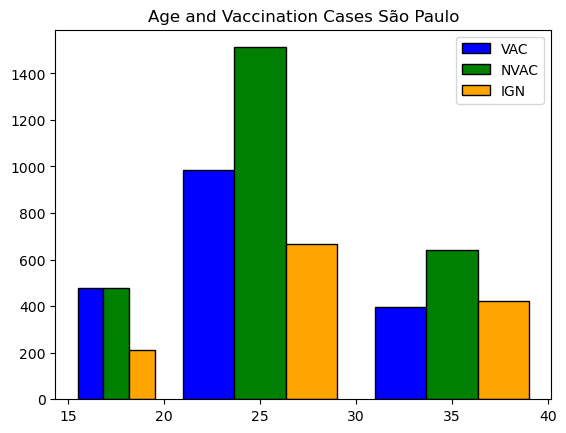

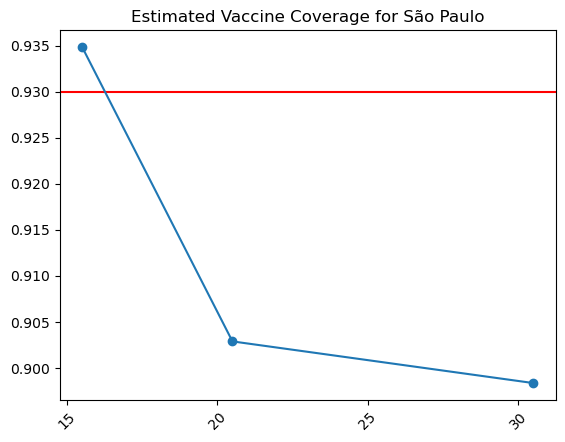

[ 841885 1832490 2015873]
[0.06516521 0.09711517 0.10163339]
437704.20726429543


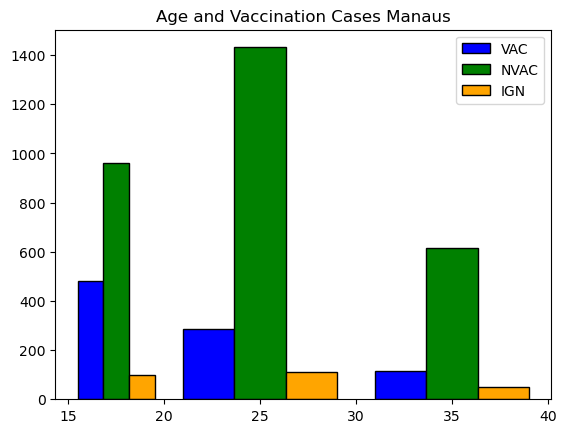

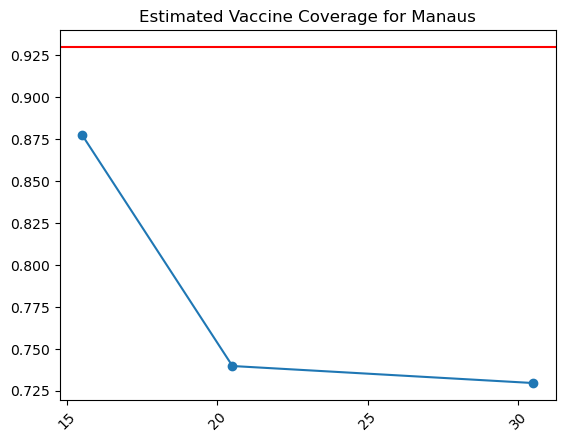

[199775 413206 378413]
[0.12247164 0.26020143 0.27034847]
234286.94213618437


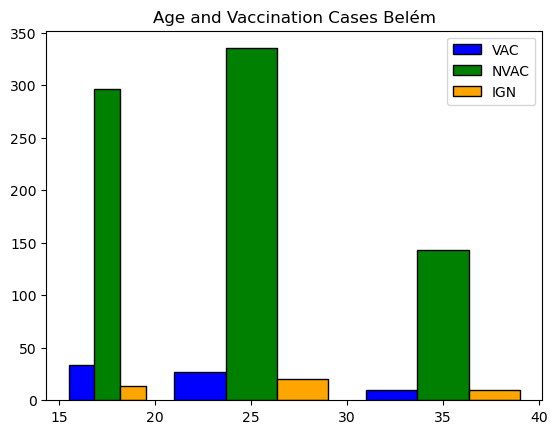

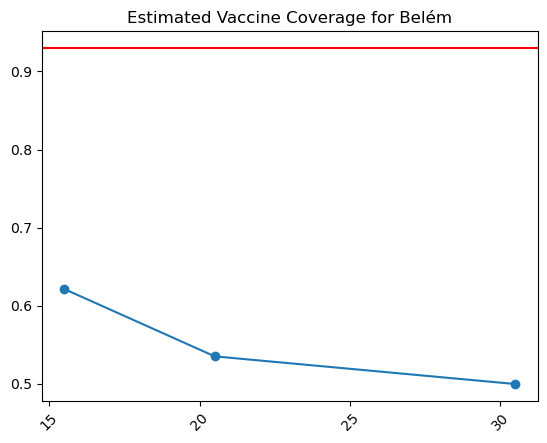

[121161 238149 250445]
[0.37865497 0.46481665 0.50024988]
281858.9152885543


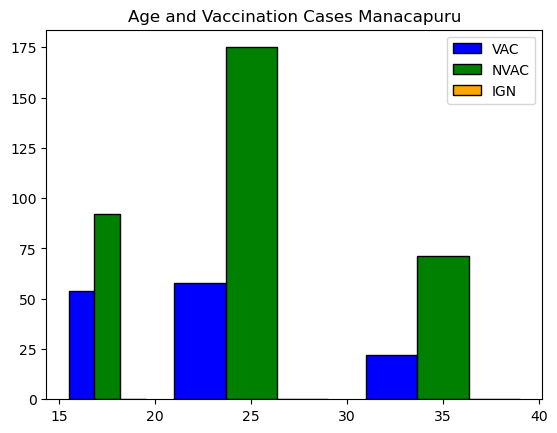

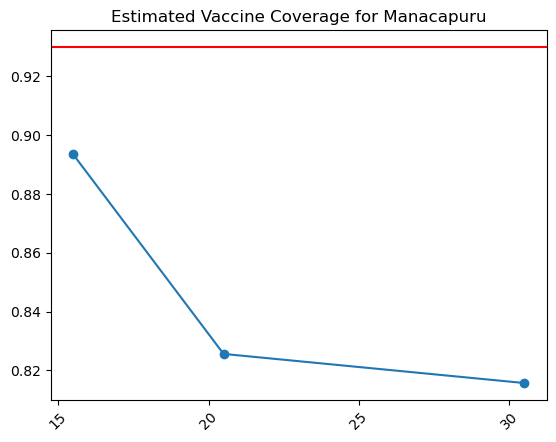

[ 9021 18360 14907]
[0.10655195 0.17437722 0.18427883]
6909.815492325293


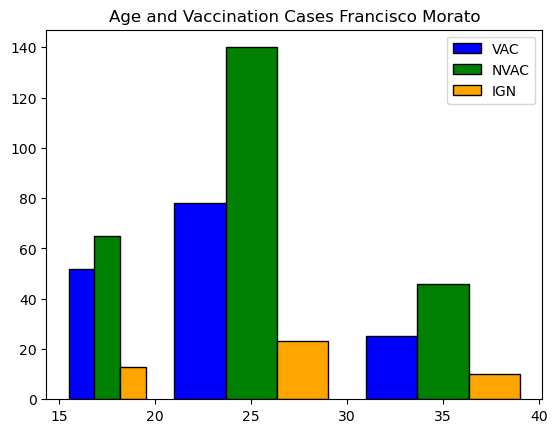

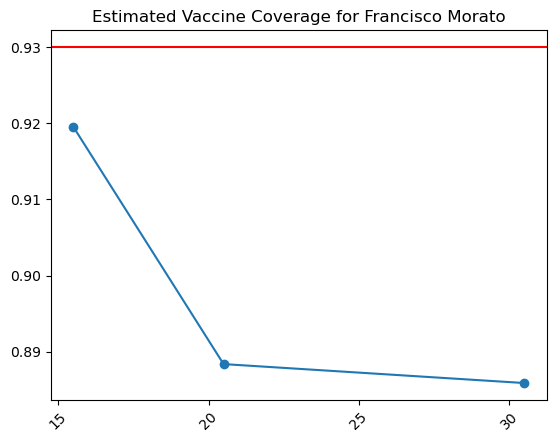

[13603 30810 29637]
[0.08045977 0.11161731 0.11410347]
7915.108258675682


In [12]:
for mun in first_10:
    df_tmp = df_mun[df_mun['ID_MN_RESI'] == mun]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] >= 15]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] <= 40]
    mun_name = df_tmp['name'].unique()[0]
    min_age = 15
    max_age = 40
    colors=['blue', 'green', 'orange']
    names=['VAC', 'NVAC', 'IGN']
    x_vac = list(df_tmp[df_tmp['CS_VACINA'] == 1]['NU_IDADE_N'])
    x_nvac = list(df_tmp[df_tmp['CS_VACINA'] == 2]['NU_IDADE_N'])
    x_ign = list(df_tmp[df_tmp['CS_VACINA'] == 9]['NU_IDADE_N'])
    bins_grouped = np.array([15,20,30,40])
    bins = plt.hist([x_vac, x_nvac, x_ign], color=colors, label=names, bins=bins_grouped, edgecolor = 'black')
    plt.title('Age and Vaccination Cases '+ str(mun_name))
    plt.legend()
    plt.show()
    vacs = bins[0][0]
    nvacs = bins[0][1]
    ign = bins[0][2]
    #vacs = vacs[1:]
    #nvacs = nvacs[1:]
    #ign = ign[1:]
    p_vacs = vacs/(vacs+nvacs)
    c_vacs = []
    for p in p_vacs:
        if(p == np.nan):
            c_vacs.append(np.nan)
        elif(p == 0):
            c_vacs.append(0)
        else:
            c_vacs.append(coverage_age(p,0.93))
    plt.xticks(np.arange(min_age,max_age+1,5), rotation = 45)
    plt.axhline(0.93,color = 'r')
    plt.title('Estimated Vaccine Coverage for '+ str(mun_name))
    plt.plot(bins[1][0:-1] + 0.5,c_vacs,'-o')
    plt.show()
    # population pyramid of this municipality
    data_sp = data_muns[data_muns['Municipio'] == mun]
    data_sp = data_sp.to_numpy()[0]
    data_sp = data_sp[5:8]
    vec_coverage = 1 - np.array(c_vacs)
    vec_population = data_sp
    vec_nvac_population = vec_coverage*vec_population
    print(data_sp)
    print(vec_coverage)
    total_nvac = np.sum(vec_coverage*vec_population)
    print(total_nvac)

### Including ignored

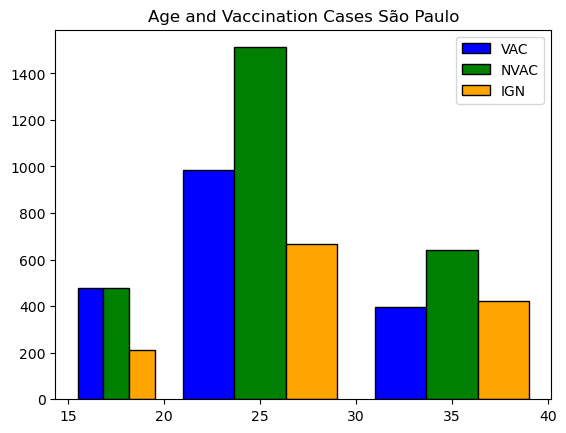

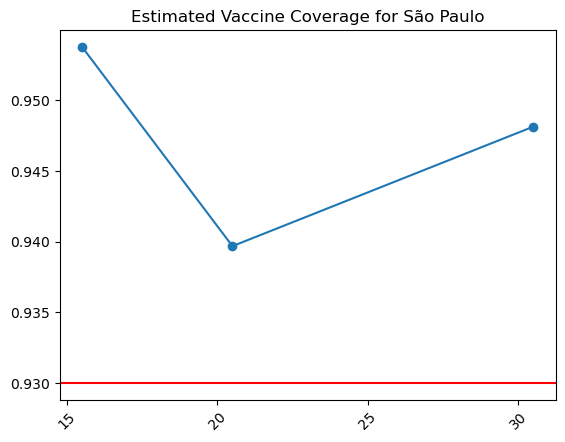

[ 841885 1832490 2015873]
[0.04622157 0.06031319 0.05186386]
253987.51554889962


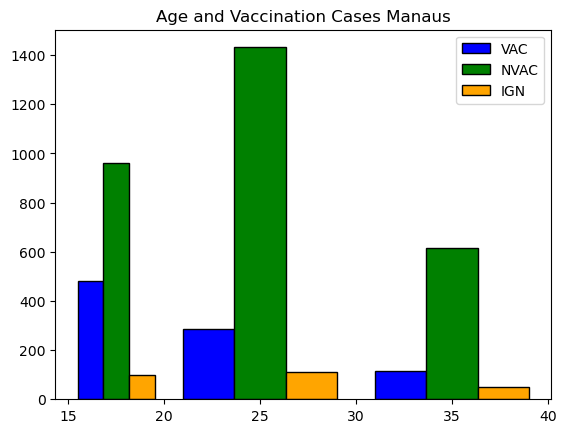

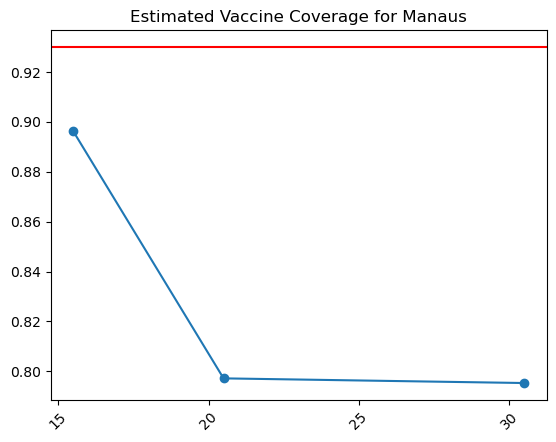

[199775 413206 378413]
[0.10376849 0.20281645 0.20468616]
181991.22663950408


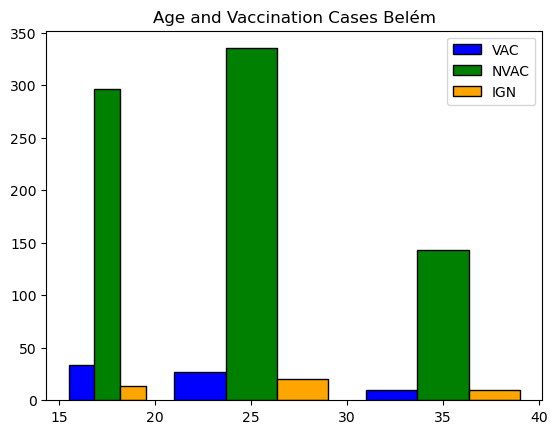

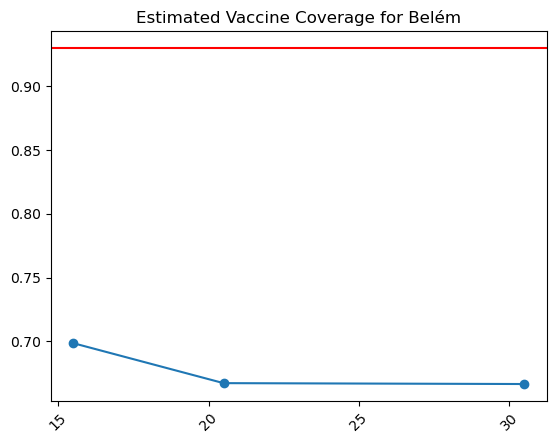

[121161 238149 250445]
[0.30151339 0.33286018 0.33355548]
199339.28621325985


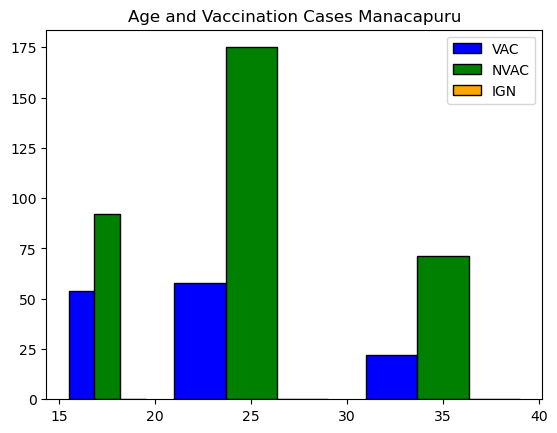

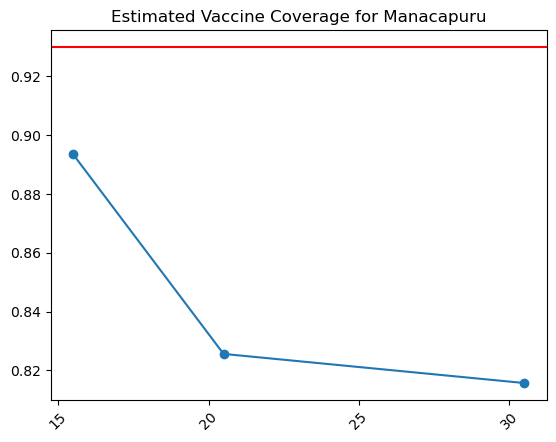

[ 9021 18360 14907]
[0.10655195 0.17437722 0.18427883]
6909.815492325293


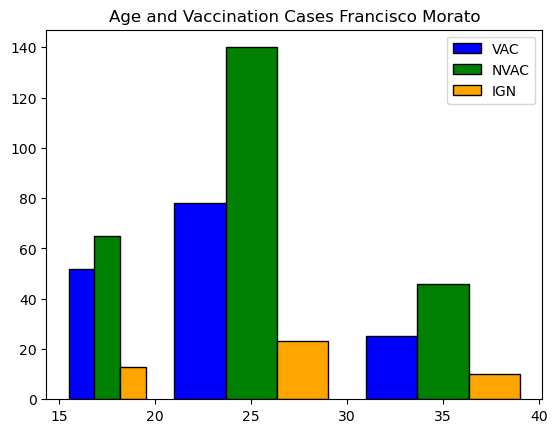

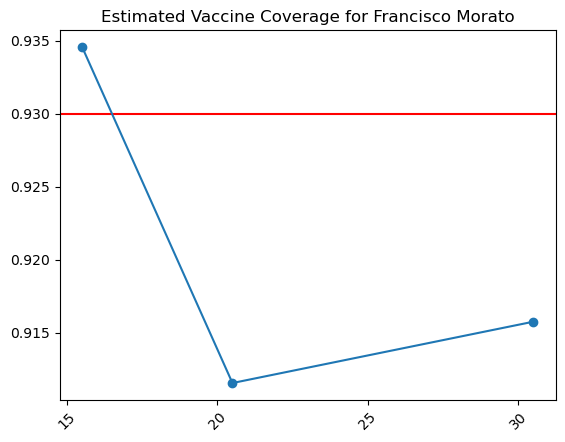

[13603 30810 29637]
[0.06542056 0.08844765 0.08424908]
6111.878199906636


In [13]:
for mun in first_10:
    df_tmp = df_mun[df_mun['ID_MN_RESI'] == mun]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] >= 15]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] <= 40]
    mun_name = df_tmp['name'].unique()[0]
    min_age = 15
    max_age = 40
    colors=['blue', 'green', 'orange']
    names=['VAC', 'NVAC', 'IGN']
    x_vac = list(df_tmp[df_tmp['CS_VACINA'] == 1]['NU_IDADE_N'])
    x_nvac = list(df_tmp[df_tmp['CS_VACINA'] == 2]['NU_IDADE_N'])
    x_ign = list(df_tmp[df_tmp['CS_VACINA'] == 9]['NU_IDADE_N'])
    bins_grouped = np.array([15,20,30,40])
    bins = plt.hist([x_vac, x_nvac, x_ign], color=colors, label=names, bins=bins_grouped, edgecolor = 'black')
    plt.title('Age and Vaccination Cases '+ str(mun_name))
    plt.legend()
    plt.show()
    vacs = bins[0][0]
    nvacs = bins[0][1]
    ign = bins[0][2]
    #vacs = vacs[1:]
    #nvacs = nvacs[1:]
    #ign = ign[1:]
    vacs = vacs + ign
    p_vacs = vacs/(vacs+nvacs)
    c_vacs = []
    for p in p_vacs:
        if(p == np.nan):
            c_vacs.append(np.nan)
        elif(p == 0):
            c_vacs.append(0)
        else:
            c_vacs.append(coverage_age(p,0.93))
    plt.xticks(np.arange(min_age,max_age+1,5), rotation = 45)
    plt.axhline(0.93,color = 'r')
    plt.title('Estimated Vaccine Coverage for '+ str(mun_name))
    plt.plot(bins[1][0:-1] + 0.5,c_vacs,'-o')
    plt.show()
    # population pyramid of this municipality
    data_sp = data_muns[data_muns['Municipio'] == mun]
    data_sp = data_sp.to_numpy()[0]
    data_sp = data_sp[5:8]
    vec_coverage = 1 - np.array(c_vacs)
    vec_population = data_sp
    vec_nvac_population = vec_coverage*vec_population
    print(data_sp)
    print(vec_coverage)
    total_nvac = np.sum(vec_coverage*vec_population)
    print(total_nvac)